## Теория

### Сравнение групп (Hypothesis Testing)

**Задача:** Узнать, есть ли фундаментальная разница между двумя кучками данных.

**Главная ловушка (Связь с ЛР3):**

* Если данные **нормальные**  Используем **t-тест Стьюдента** (Parametric).
* Если данные **НЕ нормальные** (твой случай!)  Используем **U-критерий Манна-Уитни** (Non-parametric).

> **Почему это важно:** T-тест работает с *разницей средних*. Манн-Уитни работает с *рангами* (кто кого обогнал в общем списке). Так как у тебя «кривые» данные с выбросами, среднее ломается, и T-тест врал бы. Манн-Уитни будет честнее.

---


### Корреляционный анализ

**Задача:** Понять, как один признак зависит от другого. «Если растет X, растет ли Y?»

**Пример:**

* Зависит ли количество установок (`Installs`) от рейтинга (`Rating`)?
* Зависит ли цена (`Price`) от размера (`Size`)?

**Визуализация:** Здесь королем будет **Scatter Plot** (Диаграмма рассеяния).

**Главная ловушка (Связь с ЛР3):**
Здесь тоже есть два основных игрока:

1. **Корреляция Пирсона ():** Ищет **линейную** зависимость («Чем больше X, тем больше Y *в той же пропорции*»). Требует нормальности. Один сильный выброс может исказить весь результат.
2. **Корреляция Спирмена ():** Ищет **монотонную** зависимость («Если растет X, то Y тоже растет, неважно с какой скоростью»). Работает с любым распределением, на рангах, поэтому игнорирует выбросы. **Идеальна для ненормальных данных.**



\
\
Визуализация:

- Scatter Plot (Диаграмма рассеяния): Облако точек, где по осям отложены два признака.

- Heatmap (Тепловая карта): Матрица, где цветом показана сила связи между всеми парами признаков.


# Выполнение

## Задание 1. Сравнения групп для моделированных данных

𝑋1~𝑁(𝑎1, 𝜎1) – Случайная величина $X_1$ подчиняется Нормальному закону распределения ($N$) с параметрами $a_1$ и $\sigma_1$

𝑋2~𝑁(𝑎2, 𝜎2) – Случайная величина $X_2$ подчиняется Нормальному закону распределения ($N$) с параметрами $a_1$ и $\sigma_1$

Где:

1. **$N$ (Normal)** — это наш любимый «Колокол» (Гауссово распределение).
2. **$a_1$ — Математическое ожидание (Mean).**
* Это **центр** колокола. Пик горы.
* Если ты меняешь $a$, график просто сдвигается влево или вправо по оси X.
* *В Python (numpy):* параметр `loc`.


3. **$\sigma_1$ (Сигма) — Стандартное отклонение (Standard Deviation).**
* Это **ширина** колокола.
* Если $\sigma$ маленькая — колокол узкий и высокий (стрелок бьет кучно).
* Если $\sigma$ большая — колокол расплющенный и низкий (стрелок мажет).
* *В Python (numpy):* параметр `scale`.



**Важное замечание про Дисперсию:**
В задании сказано про **дисперсию** ($D$ или $Var$).
Связь простая: **Дисперсия = $\sigma^2$** (Сигма в квадрате).

* Если  равны  Дисперсии равны.
* Если  разные  Дисперсии разные.


Проще говоря:

- Нужно раздвинуть средние? Меняй $a$.
- Нужно изменить разброс (дисперсию)? Меняй $\sigma$.

Дисперсия – scale

Среднее – loc

### Часть 1

##### 1. Дисперсии равны. Нет статистически значимых отличий между средними.

In [ ]:
import numpy as np

sample1_1 = np.random.normal(loc=150, scale=20, size=100)
sample1_2 = np.random.normal(loc=150, scale=20, size=100)


##### 2. Дисперсии равны. Есть статистически значимые отличия между средними.

In [ ]:
sample2_1 = np.random.normal(loc=150, scale=20, size=100)
sample2_2 = np.random.normal(loc=170, scale=20, size=100)

##### 3. Дисперсии не равны. Нет статистически значимых отличий между средними.

In [ ]:
sample3_1 = np.random.normal(loc=150, scale=10, size=100)
sample3_2 = np.random.normal(loc=150, scale=30, size=100)

##### 4. Дисперсии не равны. Есть статистически значимые отличия между средними.

In [ ]:
sample4_1 = np.random.normal(loc=150, scale=10, size=100)
sample4_2 = np.random.normal(loc=170, scale=30, size=100)

Вызуализирую результат, для этого лучше всего подойдет boxplot:


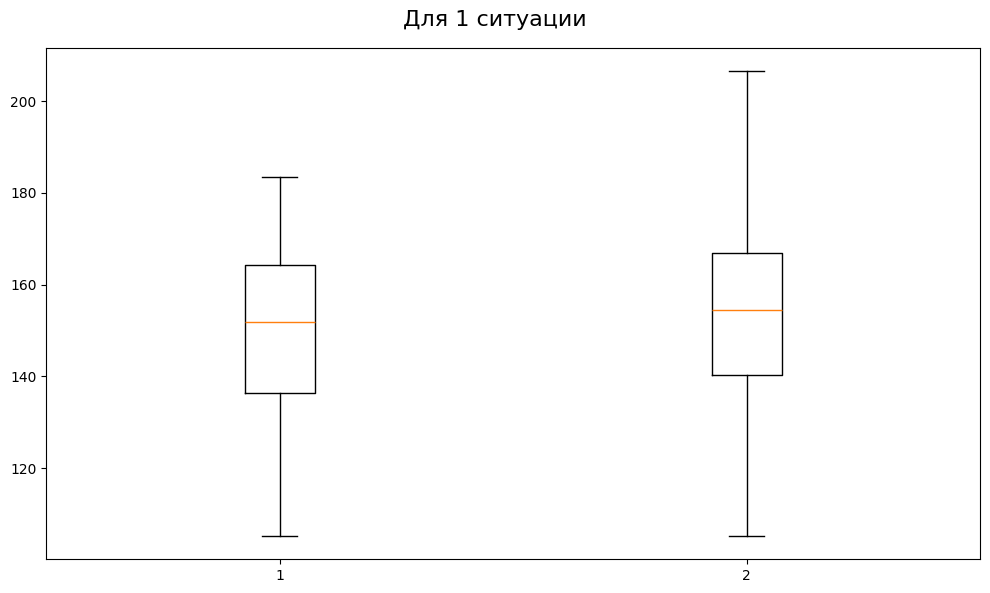

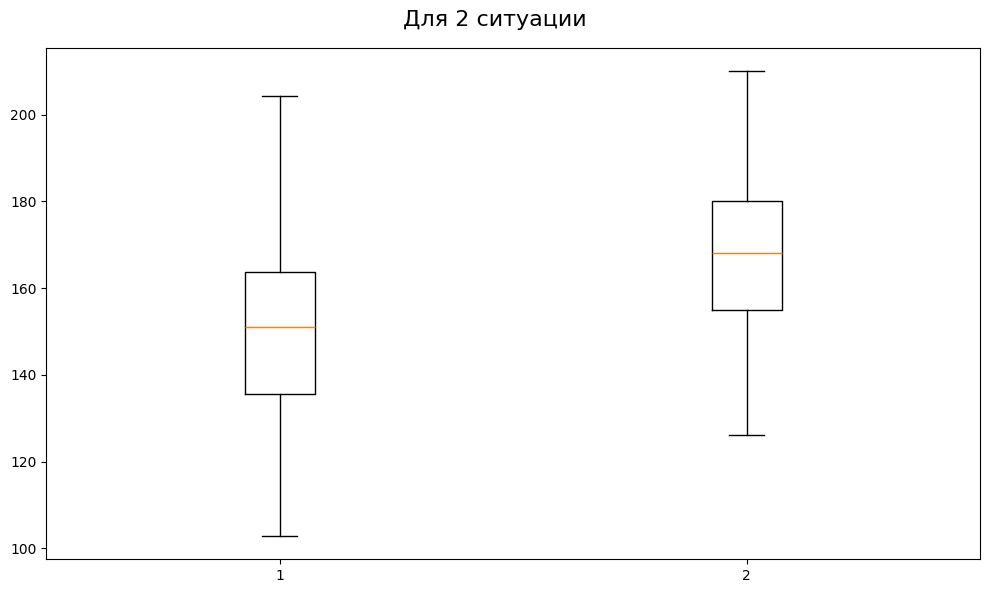

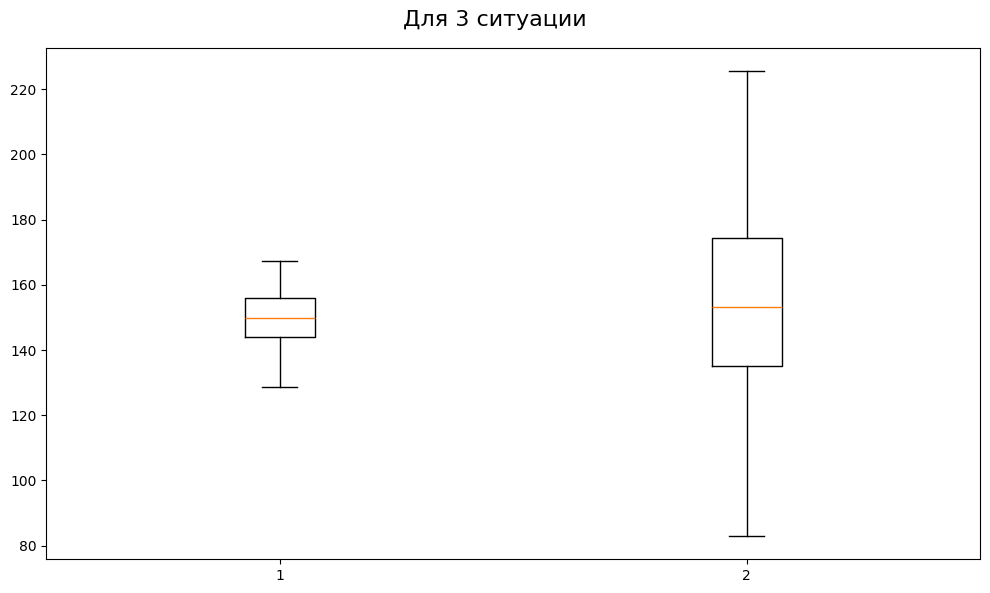

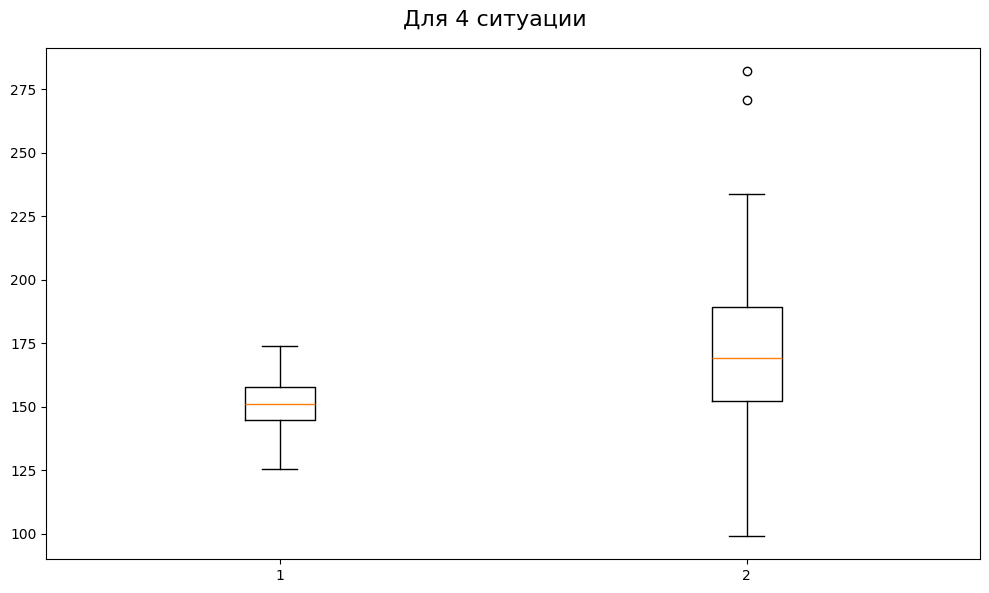

In [ ]:
import matplotlib.pyplot as plt

sme_list = [sample1_1, sample1_2, sample2_1, sample2_2, sample3_1, sample3_2, sample4_1, sample4_2]

for idx in range(0, len(sme_list), 2):
  plt.figure(figsize=(10, 6))

  plt.suptitle(f'Для {idx//2 + 1} ситуации', fontsize=16)
  plt.subplots_adjust(top=0.85)

  plt.boxplot(sme_list[idx:idx+2])

  plt.tight_layout()
  plt.show()
  print()

---

### Часть 2

#### 1. Проверка гипотез о нормальности, равенстве дисперсий и равенстве средних.

- $p > 0.05$: Мы принимаем нулевую гипотезу ($H_0$). (Всё нормально/одинаково).
- $p < 0.05$: Мы отвергаем нулевую гипотезу. (Есть значимые различия/не нормально).



##### Проверка на нормальность с помощю Пирсона

Функция возвращает кортеж из двух чисел: `(statistic, p_value)`.

* **`statistic` (W-статистика):** Это число показывает, насколько «сильно» ваши данные коррелируют с идеальным нормальным распределением.
  * Оно лежит в диапазоне от 0 до 1.
  * Чем ближе к **1**, тем больше данные похожи на идеальный «колокол».
  * Чем меньше число, тем сильнее данные отклоняются от нормы.


* **`p_value` (P-значение):** Это вероятность того, что наши данные распределены нормально. Мы используем его для принятия решения.
  * **Нулевая гипотеза ($H_0$):** Данные распределены нормально.
  * Если $p>0.05$: Мы **не можем отвергнуть** нулевую гипотезу. Считаем, что данные нормальные.
  * Если $p < 0.05$: Шанс того, что это нормальное распределение, слишком мал. Мы отвергаем гипотезу. Данные **не нормальные**.


In [ ]:
print('========== Проверка на нормальность ==========\n')

from scipy import stats

for sme_idx in range(len(sme_list)):
  statistic, p_value = stats.shapiro(sme_list[sme_idx])

  print(f"Для sample{sme_idx // 2 + 1}_{sme_idx % 2 + 1} получаем: \tstatistic={statistic:.5f} \tp_value={p_value:.5f}")


========== Проверка на нормальность ==========

Для sample1_1 получаем: 	statistic=0.96469 	p_value=0.00880
Для sample1_2 получаем: 	statistic=0.99281 	p_value=0.87644
Для sample2_1 получаем: 	statistic=0.99408 	p_value=0.94376
Для sample2_2 получаем: 	statistic=0.99350 	p_value=0.91619
Для sample3_1 получаем: 	statistic=0.98809 	p_value=0.51494
Для sample3_2 получаем: 	statistic=0.99031 	p_value=0.68929
Для sample4_1 получаем: 	statistic=0.99415 	p_value=0.94685
Для sample4_2 получаем: 	statistic=0.97399 	p_value=0.04495


В каждой проверке можно заметить, что значение W-статистики очень близки к 1, что говорит о том, что данные похожи на идеальные и не откланяются от нормы. P-значения для каждой выборки, кроме sample4_1, больше 0.05, что говорит о нормальности данных.  


##### **Про sample4_1 цитирую Gemini:**


Это называется **Ошибка первого рода (Ложная тревога)**.

1. **Суть p-value:** Уровень значимости  означает, что мы готовы смириться с вероятностью ошибки в 5%.
2. **Лотерея:** Даже если данные идеально нормальные, в 5% случаев (1 раз из 20) тест Шапиро-Уилка может случайно выдать  просто из-за того, как легли случайные числа в конкретной выборке.
3. **Твой случай:** У тебя выборка из 100 элементов. Случайные числа могли лечь так, что хвост получился чуть длиннее или горб чуть кривее, чем у идеального колокола.

**Вердикт:** Поскольку мы знаем природу данных (генерация), мы можем игнорировать эту ошибку и считать данные нормальными. Но в реальной жизни, не зная происхождения данных, мы бы сказали: «Распределение статистически значимо отличается от нормального».


##### Равенство дисперсий

Мы используем тест Левена, потому что он устойчив к небольшим отклонениям от нормальности.

**Функция:** `stats.levene(sample1, sample2)`

**Возвращает:** `(statistic, p_value)`

* **`statistic`:** Число, показывающее различие дисперсий. Чем оно больше, тем сильнее разброс в группах отличается друг от друга.
* **`p_value`:** Вероятность того, что дисперсии одинаковы.

**Интерпретация:**

* **Нулевая гипотеза ($H_0$):** Дисперсии групп **равны** ($\sigma_1^2 = \sigma_2^2$).
* **$p > 0.05$:** Мы **принимаем** $H_0$. Дисперсии считаются равными.
  *  $\to$ В T-тесте будем использовать параметр `equal_var=True`.


* **$p < 0.05$:** Мы **отвергаем** $H_0$. Дисперсии **различны** (одна группа кучная, другая размашистая).
  *  $\to$ В T-тесте будем использовать параметр `equal_var=False`.


In [ ]:
print('========== Равенство дисперсий ==========\n')

for sme_idx in range(0, len(sme_list), 2):
  statistic, p_value = stats.levene(sme_list[sme_idx], sme_list[sme_idx+1])

  print(f'Для {sme_idx//2 + 1} пары выборки получаем:\nstatistic={statistic:.5f}\tp_value={p_value:.5f}\n\n')

========== Равенство дисперсий ==========

Для 1 пары выборки получаем:
statistic=0.80264	p_value=0.37139


Для 2 пары выборки получаем:
statistic=1.54357	p_value=0.21556


Для 3 пары выборки получаем:
statistic=80.19581	p_value=0.00000


Для 4 пары выборки получаем:
statistic=57.12736	p_value=0.00000




В результатах, данные сходятся.

Для 1 и 2 пары, значение p сильно больше $0.05$, что говорит о том, что вероятность того, что дисперсии одинаковые — огромная и мы принимаем гипотизу о равенстве. Это подтверждается и условием создания этих пар.

Для 3 и 4 пары, значения p равны $0.00$ что горит о том, что диспрсии точно разные и мы отвергаем гипотизу. Это так же подтверждается и условием создания этих пар.



##### Равенство средних

Это наш главный инструмент для ответа на вопрос: «Есть ли разница между группами?».

**Функция:** `stats.ttest_ind(sample1, sample2, equal_var=...)`
*(ind = independent, независимые выборки)*

**Возвращает:** `(statistic, p_value)`

* **`statistic` (t-статистика):**
  * Если близко к **0** $\to$ Средние почти одинаковые.
  * Если число **большое** (по модулю, например, -5 или +10) $\to$ Средние сильно отличаются.
  * *Знак минус* означает, что среднее первой группы меньше второй. *Плюс* — наоборот.
* **`p_value`:** Вероятность того, что средние равны.

**Интерпретация:**

* **Нулевая гипотеза ($H_0$):** Средние значения групп **равны** ($\mu_1 = \mu_2$). Различия случайны.
* **$p > 0.05$:** Мы **принимаем** $H_0$. Различий нет.
* **$p < 0.05$:** Мы **отвергаем** $H_0$. Различия **статистически значимы**. (Например, платные приложения действительно лучше бесплатных).


In [ ]:
print('========== Равенство средних ==========\n')

for sme_idx in range(0, len(sme_list), 2):
  statistic, p_value = stats.levene(sme_list[sme_idx], sme_list[sme_idx+1])
  if p_value > 0.05:
    equal_var = True
  else:
    equal_var = False
  statistic, p_value = stats.ttest_ind(sme_list[sme_idx], sme_list[sme_idx + 1], equal_var=equal_var)

  print(f'Для {sme_idx//2 + 1} пары выборки получаем:\nstatistic={statistic:.5f}\tp_value={p_value:.5f}\n\n')


========== Равенство средних ==========

Для 1 пары выборки получаем:
statistic=-1.41189	p_value=0.15955


Для 2 пары выборки получаем:
statistic=-6.89160	p_value=0.00000


Для 3 пары выборки получаем:
statistic=-1.17733	p_value=0.24150


Для 4 пары выборки получаем:
statistic=-5.82548	p_value=0.00000




Для 1 и 3 пары видно, что значение p больше $0.05$, что говорит о том, что среднее значение скорее всего равное, что так же подтверждается условиес создания этих пар.

А для 2 и 4 пары, значание p раное $0.00$, из чего можно сделать вывод о том, что для них средние значения разные. Так же, можно сделать вывод о том, что средние значения первой группы меньше чем во второй (по знаку $-$ statistic)

#### 2. На одном графике построить гистограммы Х1 и Х2, оценки плотностей для обеих выборок, вертикальными линиями отметить средние значения.

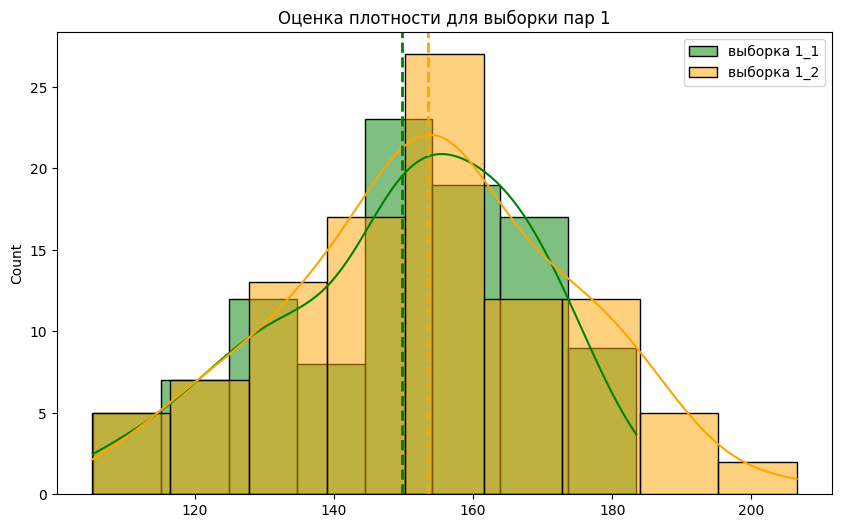

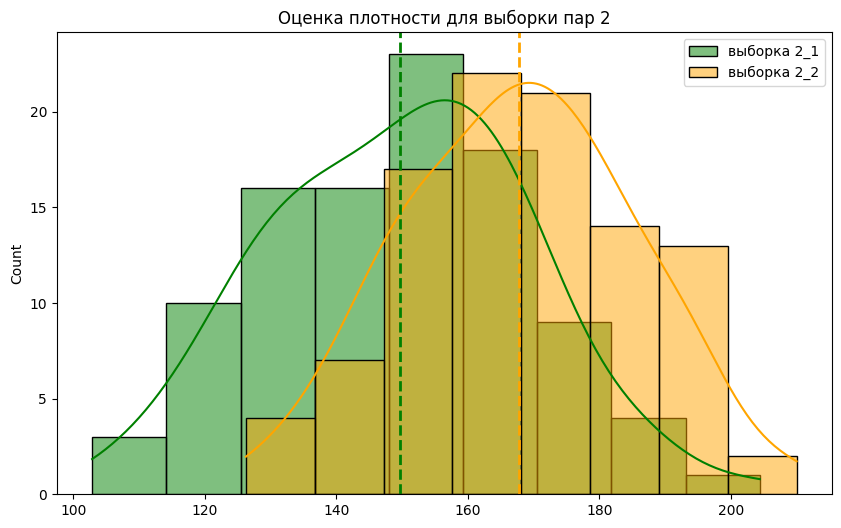

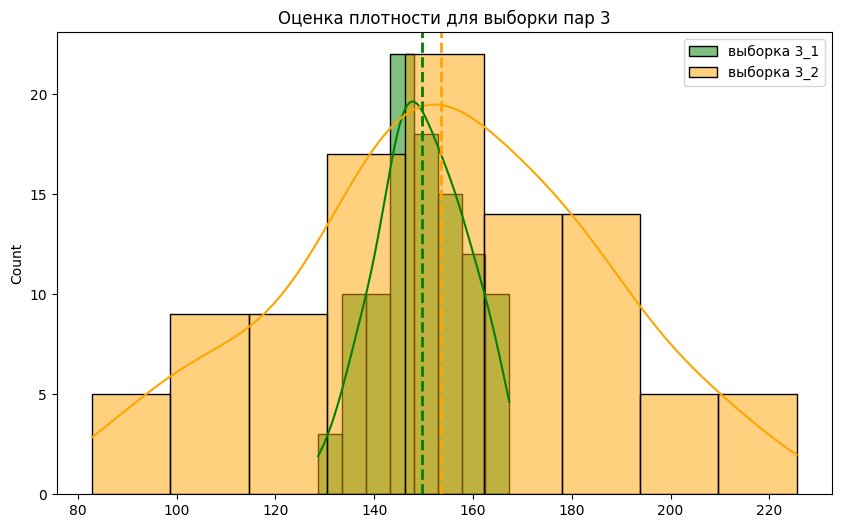

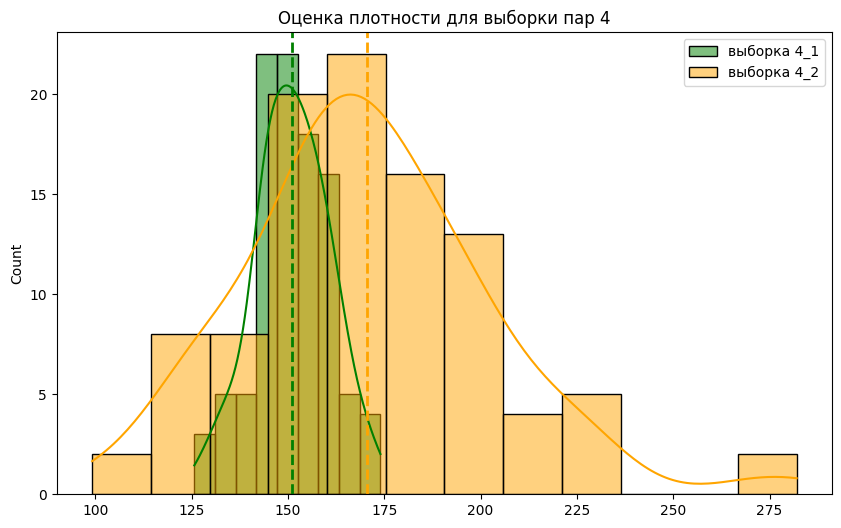

In [ ]:
import seaborn as sns

for sme_idx in range(0, len(sme_list), 2):
  plt.figure(figsize=(10, 6))
  plt.title(f'Оценка плотности для выборки пар {sme_idx//2+1}')

  sns.histplot(sme_list[sme_idx], kde=True, alpha=0.5, color='green', label=f'выборка {sme_idx // 2 + 1}_{sme_idx % 2 + 1}')
  sns.histplot(sme_list[sme_idx + 1], kde=True, alpha=0.5, color='orange', label=f'выборка {sme_idx // 2 + 1}_{sme_idx % 2 + 2}')

  plt.axvline(np.mean(sme_list[sme_idx]), color='green', linestyle='--', linewidth=2)
  plt.axvline(np.mean(sme_list[sme_idx + 1]), color='orange', linestyle='--', linewidth=2)

  plt.legend()
  plt.show()
  print()




#### 3. На другом графике построить диаграммы размаха

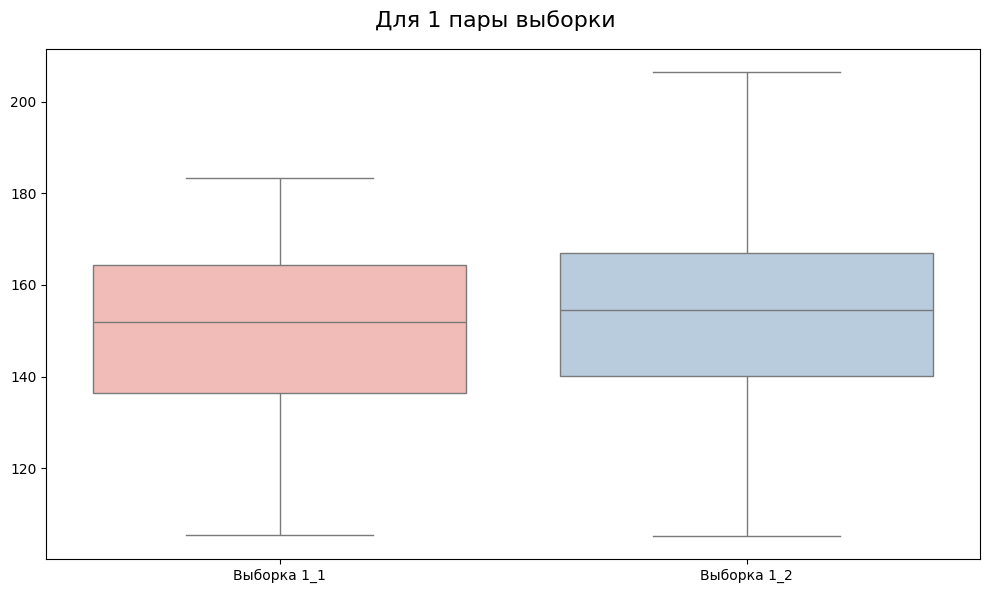

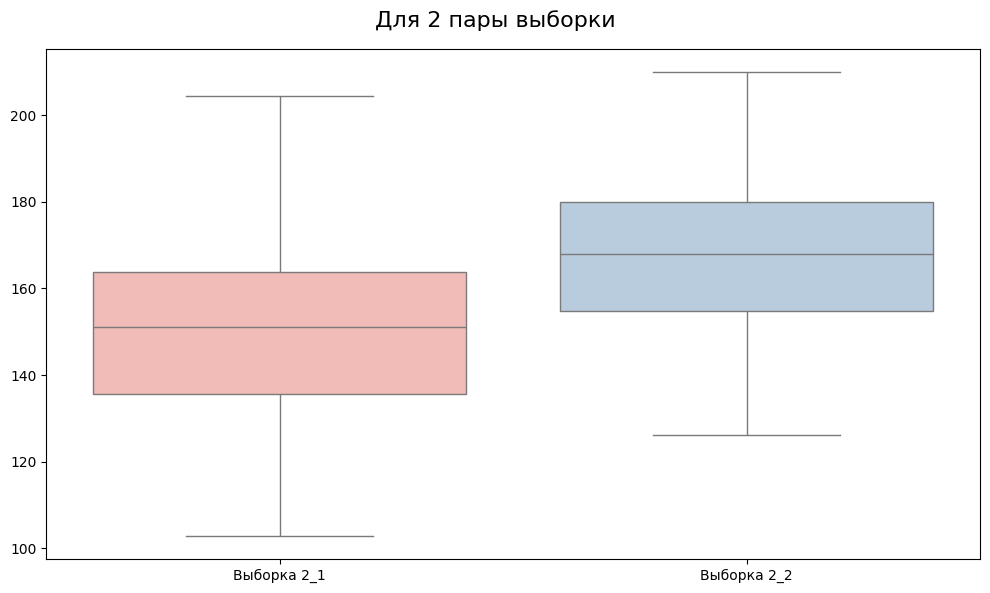

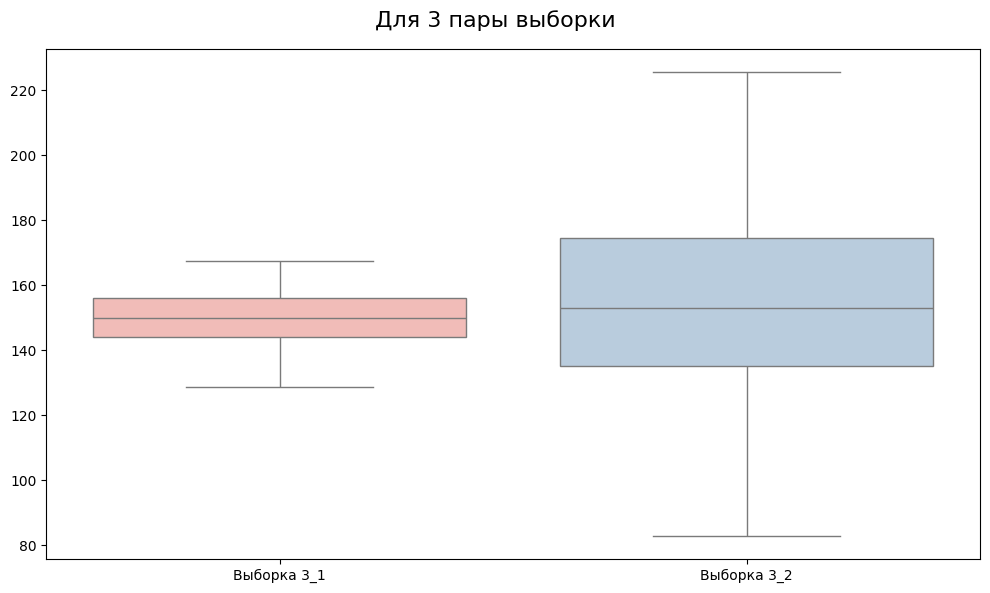

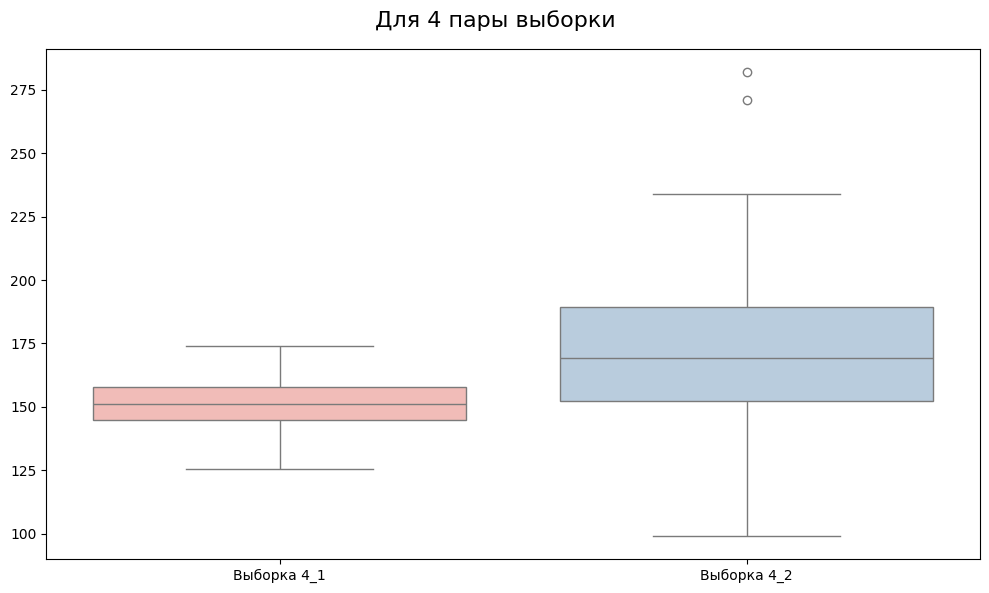

In [ ]:

for sme_idx in range(0, len(sme_list), 2):
  plt.figure(figsize=(10, 6))

  plt.suptitle(f'Для {sme_idx // 2 + 1} пары выборки', fontsize=16)
  plt.subplots_adjust(top=0.85)

  sns.boxplot(sme_list[sme_idx:sme_idx + 2], palette='Pastel1')
  plt.xticks([0, 1], [f'Выборка {sme_idx // 2 + 1}_1', f'Выборка {sme_idx // 2 + 1}_2'])

  plt.tight_layout()
  plt.show()
  print()

## Задание 2. Сравнение групп для реальных данных

Выберите набор структурированных данных. Проверьте все возможные гипотезы о равенстве средних показателей представленных групп. (Возьмите по одному признаку. Например, рост студентов технического и гуманитарного направлений)

Я возьму датасет tips о том, сколько чаевых оставляют

В нем есть следующие колонки:

Числовые (Метрики):
- total_bill — общая сумма счета (в долларах).
- tip — сумма чаевых.

Категориальные (Группы):
- sex — пол плательщика (Male/Female).
- smoker — курит ли человек (Yes/No).
- day — день недели (Thur, Fri, Sat, Sun).
- time — время посещения (Lunch/Dinner).



In [ ]:
import seaborn as sns

df = sns.load_dataset('tips')

print(df.head())
print(len(df))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
244


Выбирем два признака, с которыми будем работать:
- Сумма чека
- Куряший

Из них сделаем два новых признака, которые будем порверять на гипотизы:
- Сумма чека курящего
- Сумма чека не курящего

In [ ]:
smoker_bills = df[df['smoker'] == 'Yes']['total_bill']
non_smoker_bills = df[df['smoker'] == 'No']['total_bill']
print(len(smoker_bills))
print(len(non_smoker_bills))



93
151


### Проверка гипотиз

### Проверка на нормальность

In [ ]:
from scipy import stats

statistic_s, p_value_s = stats.shapiro(smoker_bills)
statistic_ns, p_value_ns = stats.shapiro(non_smoker_bills)

print('============ Для переменной smoker_bills ============')
print(f'\tstatistic = {statistic_s:.5f}\tp_value = {p_value_s:.5f}\n\n')

print('========== Для переменной non_smoker_bills ==========')
print(f'\tstatistic = {statistic_ns:.5f}\tp_value = {p_value_ns:.5f}')

============ Для переменной smoker_bills ============
	statistic = 0.93674	p_value = 0.00022


========== Для переменной non_smoker_bills ==========
	statistic = 0.90453	p_value = 0.00000


Из результатов, можно сделать выводы:
- p_value в обоих вариантах меньше 0.05, что говорит о том, что шанс того, что данные нормальные,  практически нулевой.
- statistic в обоих слуачая говорит о том, что данные очень близки к иделаьным, так как в обоих слкчаях это значение стремиться к 1.

Статистическая значимость отклонения (низкий p-value) в данном случае обусловлена большим объемом выборки ($N=244$), из-за чего тест становится крайне чувствительным даже к малейшим отклонениям от идеальной кривой Гаусса.

Из за того, что данные. не нормальные, вместо сравнения средних, будем использовать сравнеие рангов (Манна-Уитни).

### Сравнение рангов

In [ ]:
statistic, p_value = stats.mannwhitneyu(smoker_bills, non_smoker_bills)

print('============ Сравнение рангов ============')
print(f'statistic = {statistic:.5f}\tp_value = {p_value:.5f}\n\n')

============ Сравнение рангов ============
statistic = 7531.50000	p_value = 0.34133




Из полученных результатов можно сделать следующие выводы:
- значение p – оно составляет 0.34 что говорит о том, что шанс получить такие данные случайно велик (34%) и сложно говорить о том, что тут есть закономерность.
- U-критерий – он равен 7531.5. посчитаем среднее:
$$\mu = \frac{n_1 \times n_2}{2} = \frac{93 \times 151}{2} = 7021.5$$
Из значаения среднего можно сказать, что текущие данные сильно не отличаются от среднего, только есть небольшой сдвиг на 500 к курильщикам, который перекрывается значением p.

Перейдем к проверке гипотиз о равенстве дисперсий.

### Равенство дисперсий

In [ ]:
statistic, p_value = stats.fligner(smoker_bills, non_smoker_bills)

print('============ Равенство дисперчий ============')
print(f'statistic = {statistic:.5f}\tp_value = {p_value:.5f}\n\n')

============ Равенство дисперчий ============
statistic = 4.55833	p_value = 0.03276




Из этих результатов можно сделать выводы:
- значаение p – оно меньше 0.05 что говорит о том, что разброс (дисперсии) большой.
- $\chi^2$ давольно большой, что говорит о том, что разброс сильный и с данные сильно отличаються др от др.

### std

In [ ]:
print(f'STD для курящик: {smoker_bills.std():.5f}')
print(f'STD для не курящик: {non_smoker_bills.std():.5f}')

STD для курящик: 9.83215
STD для не курящик: 8.25558


Можно сдеалть выод:
- курщие (9.83215) – у них большой разброс, чеки часто бывают как очень маленькими, так и очень большими.

- не курящие (8.25558) – у них меньший разброс, суммы чеков более кучные и предсказуемые

## Задание 3. Для своего набора данных провести корреляционный анализ признаков. Сделать выводы

### Матрица корреляции

Начнем анализ с построения матрицы корреляции

In [ ]:
corr_matrix = df.corr(method='spearman', numeric_only=True)

print(corr_matrix)

            total_bill       tip      size
total_bill    1.000000  0.678968  0.604791
tip           0.678968  1.000000  0.468268
size          0.604791  0.468268  1.000000


Самая сильная связь у total_bill и tip

Text(0.5, 1.0, 'Матрица корреляции Спирмена для всех признаков')

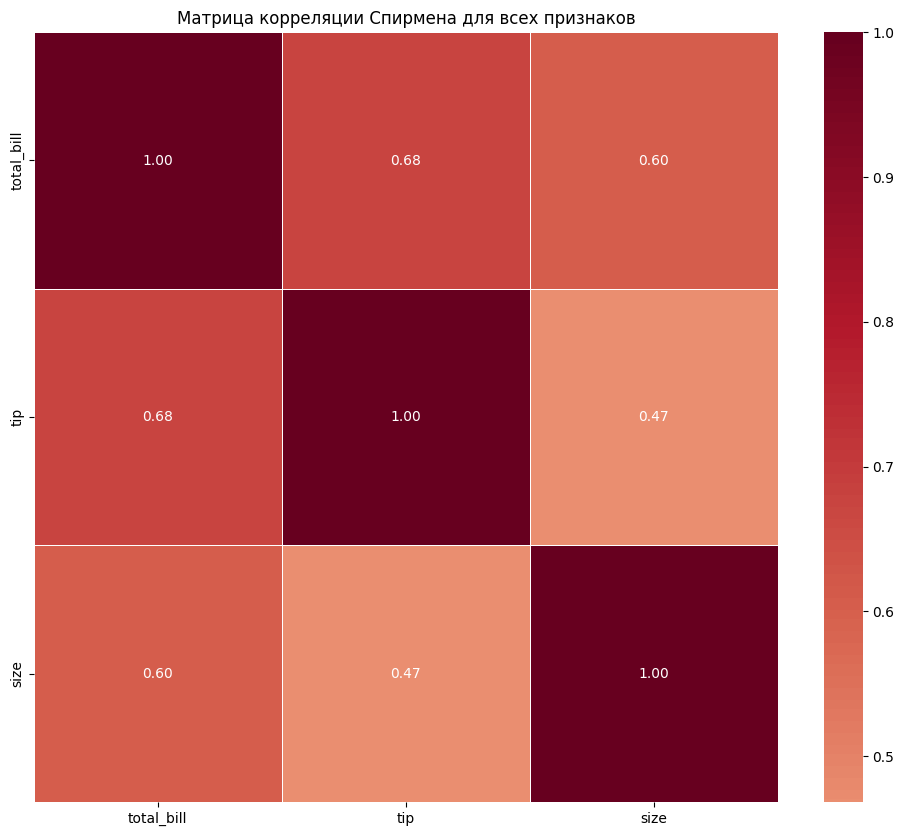

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляции Спирмена для всех признаков')

Построим карту рассеявания:

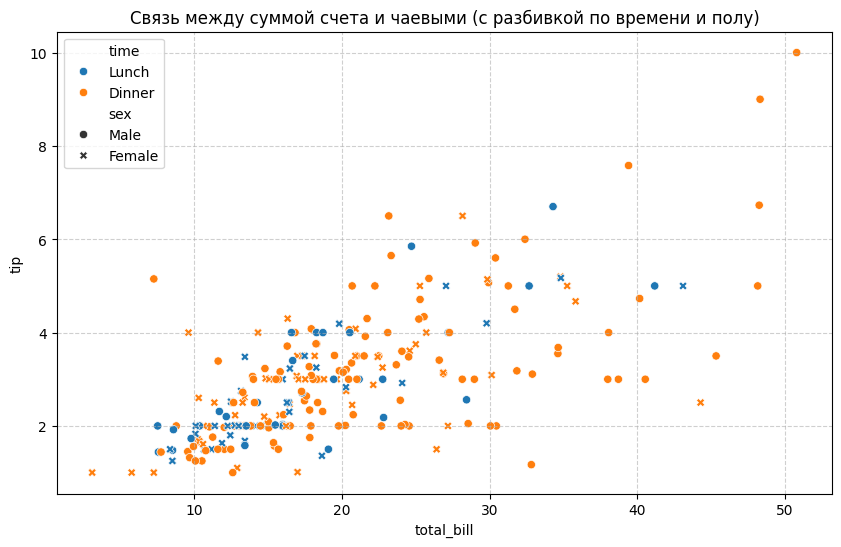

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_bill', y='tip', hue='time', style='sex')
plt.title('Связь между суммой счета и чаевыми (с разбивкой по времени и полу)')
plt.grid(True, linestyle='--', alpha=0.6)

Точная проверка значимости для ключевой пары через коэффициент Спирмена

In [ ]:
from scipy import stats

rho, p_val = stats.spearmanr(df['total_bill'], df['tip'])

print(f"Коэффициент Спирмена (Bill vs Tip): {rho:.4f}")
print(f"P-value: {p_val:.4e}")

Коэффициент Спирмена (Bill vs Tip): 0.6790
P-value: 2.5012e-34


- Size ↔ Total Bill ($\rho \approx 0.60$): Сильная логическая связь. Больше людей — больше еды.Size ↔
- Tip ($\rho \approx 0.49$): Связь заметно слабее.Вывод: Увеличение компании гарантирует рост выручки ресторана, но не гарантирует пропорциональный рост дохода официанта. «Групповой эффект» немного размывает индивидуальную щедрость.

---

- Время (time_Dinner): Имеет слабую положительную корреляцию с чеком. Ужин — «золотое время» для среднего чека.

- Пол (sex_Female): В данном датасете наблюдается слабая отрицательная корреляция с суммой чека, что указывает на то, что мужчины чаще совершают более крупные заказы.